In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
from copy import deepcopy
from scipy import signal, ndimage
import ipywidgets as widgets
from ipywidgets import interact,Layout
%matplotlib inline

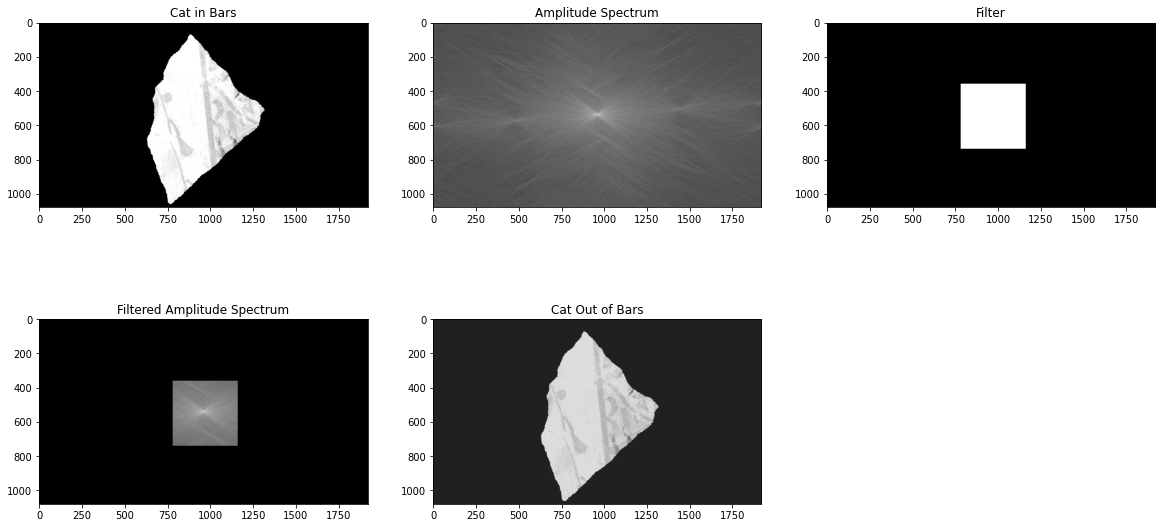

In [19]:
cat_bars = cv2.imread('RPf_00152_obj.png',0) # Reads the original grayscale image
#======= Replace with code to get the cat out of the bars
img_fft = np.fft.fft2(cat_bars)
fshift = np.fft.fftshift(img_fft)

amplitude = 20 * np.log(np.abs(fshift) + 1) #np.zeros_like(cat_bars) # Replace with code to get the image’s amplitude spectrum

mask = np.zeros_like(cat_bars) # Replace with code to create the binary filter (mask)
rows,cols = cat_bars.shape
crow,ccol = rows//2,cols//2
mask_size = 30
mask[crow-mask_size:crow+mask_size,ccol-mask_size:ccol+mask_size] = 1

fshift*=mask
amplitude_filtered = 20 * np.log(np.abs(fshift) + 1) # The amplitude spectrum after the filtering.
cat_out_of_bars = np.fft.ifft2(np.fft.ifftshift(fshift)) # Replace with code to get the cat out of bars (the filtered image)
#========

# Showing the 5 plots requested in this section
fig, axes = plt.subplots(2,3, figsize=(20, 10))
fig.delaxes(axes[1,2])
for img, ax, title in zip([cat_bars, amplitude, mask, amplitude_filtered, np.abs(cat_out_of_bars)],
                          chain.from_iterable(axes), 
                          ["Cat in Bars", "Amplitude Spectrum", "Filter", "Filtered Amplitude Spectrum", "Cat Out of Bars"]):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    


In [17]:
cv2.imwrite("fourier_RPf_00152_obj.png",abs(cat_out_of_bars))

True

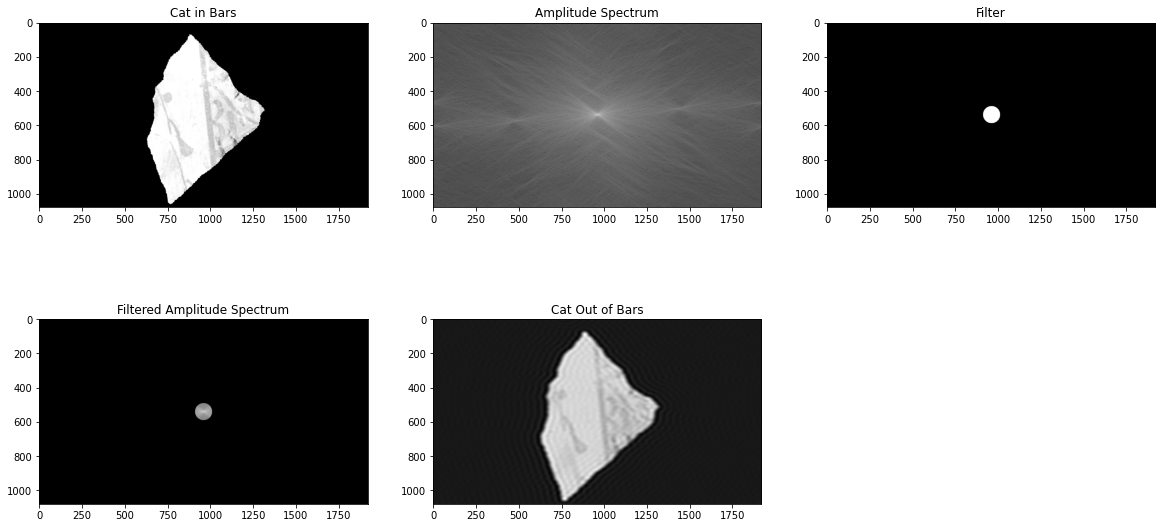

In [23]:

                
                
cat_bars = cv2.imread('RPf_00152_obj.png',0) # Reads the original grayscale image
#======= Replace with code to get the cat out of the bars
img_fft = np.fft.fft2(cat_bars)
fshift = np.fft.fftshift(img_fft)

amplitude = 20 * np.log(np.abs(fshift) + 1) #np.zeros_like(cat_bars) # Replace with code to get the image’s amplitude spectrum

mask = np.zeros_like(cat_bars) # Replace with code to create the binary filter (mask)
rows,cols = cat_bars.shape
crow,ccol = rows//2,cols//2

r = 50

for i in range(crow-r, crow+r):
        for j in range(ccol-r, ccol + r):
            if (crow - i) ** 2 + (ccol - j) ** 2 <= r**2:
                mask[i,j]=1


fshift*=mask
amplitude_filtered = 20 * np.log(np.abs(fshift) + 1) # The amplitude spectrum after the filtering.
cat_out_of_bars = np.fft.ifft2(np.fft.ifftshift(fshift)) # Replace with code to get the cat out of bars (the filtered image)
#========

# Showing the 5 plots requested in this section
fig, axes = plt.subplots(2,3, figsize=(20, 10))
fig.delaxes(axes[1,2])
for img, ax, title in zip([cat_bars, amplitude, mask, amplitude_filtered, np.abs(cat_out_of_bars)],
                          chain.from_iterable(axes), 
                          ["Cat in Bars", "Amplitude Spectrum", "Filter", "Filtered Amplitude Spectrum", "Cat Out of Bars"]):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    


# New Experiment

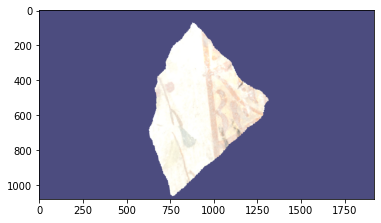

In [15]:
img = cv2.imread('RPf_00152_obj.png')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [73]:
def fourier_trans(img_,mask):
    img_fft = np.fft.fft2(img_)
    fshift = np.fft.fftshift(img_fft)
    amplitude = 20 * np.log(np.abs(fshift) + 1)
    fshift*=mask
    amplitude_filtered = 20 * np.log(np.abs(fshift) + 1) 
    return np.abs(np.fft.ifft2(np.fft.ifftshift(fshift))),amplitude,amplitude_filtered #np.abs

def plot_fourier(img,amplitude,mask,amplitude_filtered,img_filtered):
    fig, axes = plt.subplots(2,3, figsize=(20, 10))
    fig.delaxes(axes[1,2])
    for img, ax, title in zip([img, amplitude, mask, amplitude_filtered, np.abs(img_filtered)],
                              chain.from_iterable(axes), 
                              ["img", "Amplitude Spectrum", "Filter", "Filtered Amplitude Spectrum", "img filtered"]):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
#     for img, ax, title in zip([img, amplitude, img_filtered],
#                               axes.flatten(), 
#                               ["img", "Filtered Amplitude Spectrum", "img filtered"]):
#         ax.imshow(img, cmap='gray')
#         ax.set_title(title)


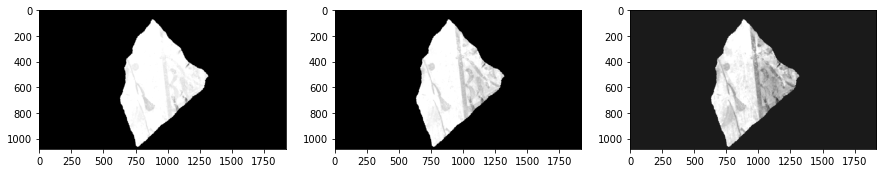

In [74]:
r,g,b = cv2.split(img_rgb)
fig,axes = plt.subplots(1,3,figsize=(15,15))
axes[0].imshow(r,cmap="gray")
axes[1].imshow(g,cmap="gray")
axes[2].imshow(b,cmap="gray")

In [75]:
r.shape

(1080, 1920)

In [101]:
def build_circle_mask(radius,channel):
    circle_mask = np.zeros_like(channel)
    rows,cols = channel.shape
    crow,ccol = rows//2,cols//2

    for i in range(crow-radius, crow+radius):
            for j in range(ccol-radius, ccol + radius):
                if (crow - i) ** 2 + (ccol - j) ** 2 <= radius**2:
                    circle_mask[i,j]=1
    return circle_mask

def build_rectangle_low_pass(height,width,channel):
    zeros = np.zeros_like(channel)
    rows,cols = channel.shape
    crow,ccol = rows//2,cols//2
    zeros[crow-height:crow+height,ccol-width:ccol+width] = 1
    return zeros


def mask_fourier(channels,masks):
    filtered_channels = []
    for channel,mask in zip(channels,masks):
        filtered_channel,amplitude,amplitude_filtered = fourier_trans(channel,mask)
        filtered_channels.append(filtered_channel)
        plot_fourier(channel,amplitude,mask,amplitude_filtered,filtered_channel)
    
    return np.dstack([filtered_channels[0].astype(int), 
                       filtered_channels[1].astype(int), 
                       filtered_channels[2].astype(int)])

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


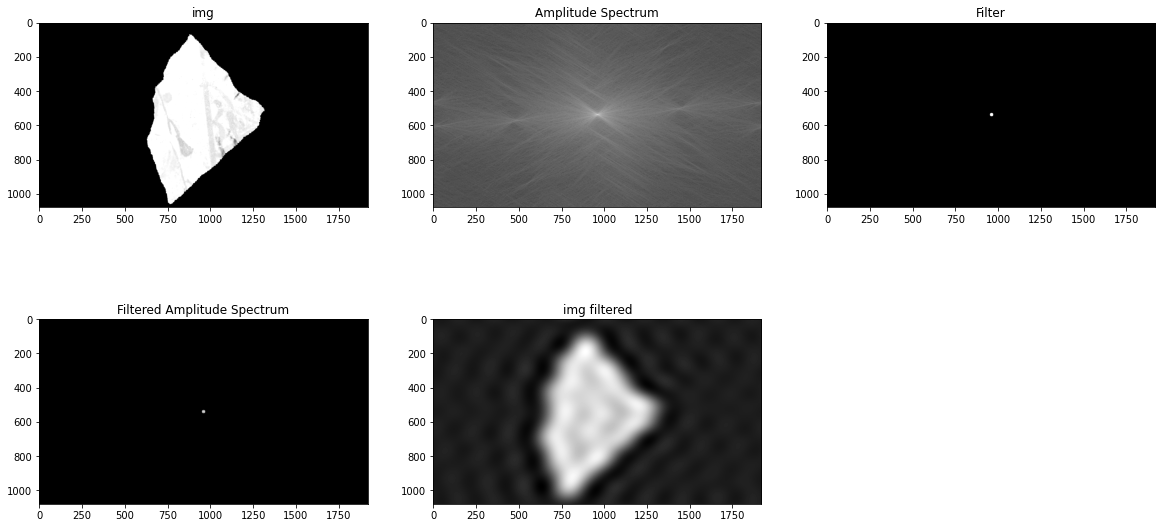

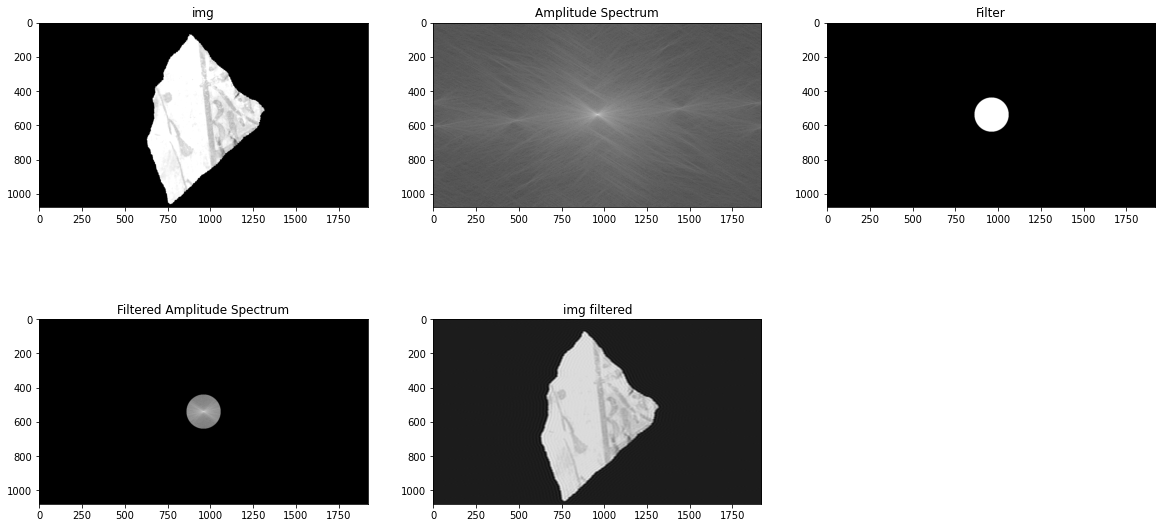

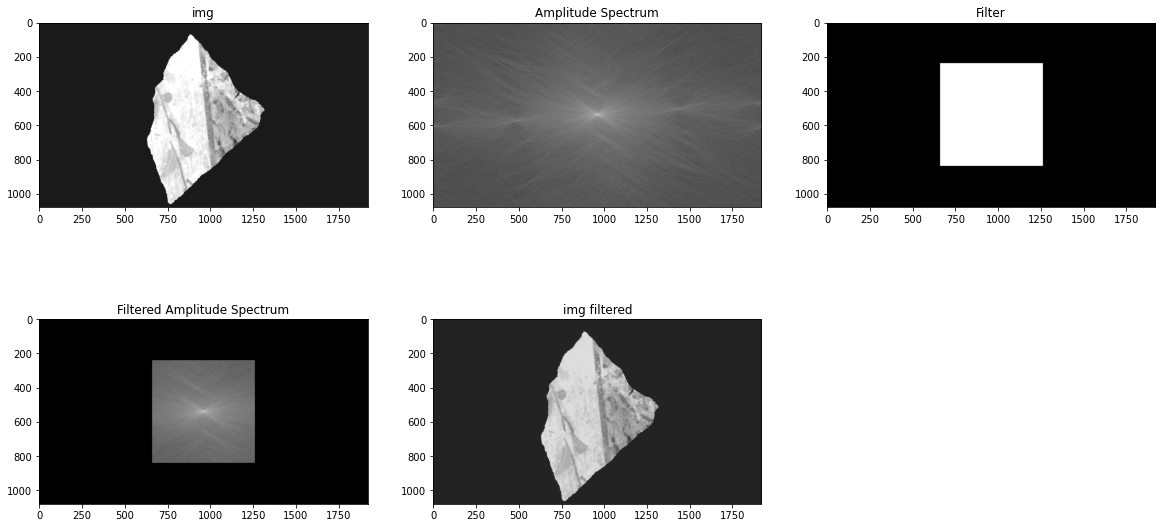

In [102]:
#masks = [build_circle_mask(10,r),build_circle_mask(100,g),build_circle_mask(300,b)]
masks = [build_circle_mask(10,r),build_circle_mask(100,g),build_rectangle_low_pass(300,300,b)]

filtered_channels = []

for channel,mask in zip([r,g,b],masks):
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
    filtered_channel,amplitude,amplitude_filtered = fourier_trans(channel,mask)
    filtered_channels.append(filtered_channel)
    plot_fourier(channel,amplitude,mask,amplitude_filtered,filtered_channel)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


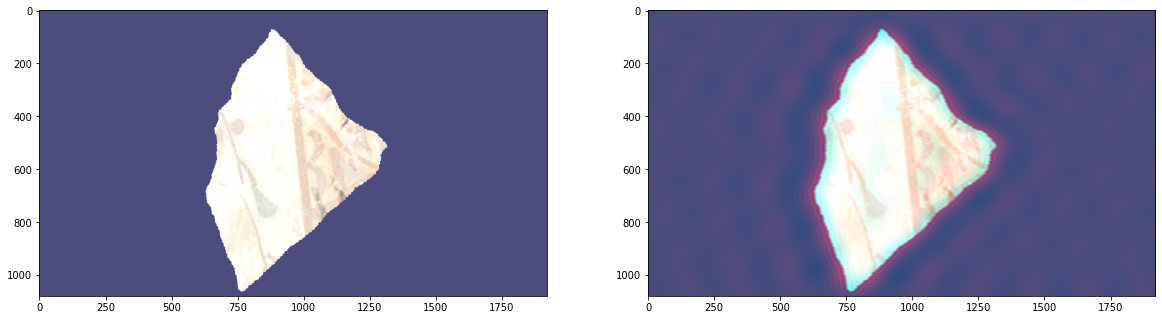

In [103]:
# filtered_img_rgb =cv2.merge((np.abs(filtered_channels[0]),
#                              np.abs(filtered_channels[1]),
#                              np.abs(filtered_channels[2])))

# filtered_img_rgb =cv2.merge((filtered_channels[0],
#                              filtered_channels[1],
#                              filtered_channels[2]))

filtered_img_rgb = np.dstack([filtered_channels[0].astype(int), 
                       filtered_channels[1].astype(int), 
                       filtered_channels[2].astype(int)])

fig,axes = plt.subplots(1,2,figsize=(20,20))
axes[0].imshow(img_rgb)
axes[1].imshow(filtered_img_rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


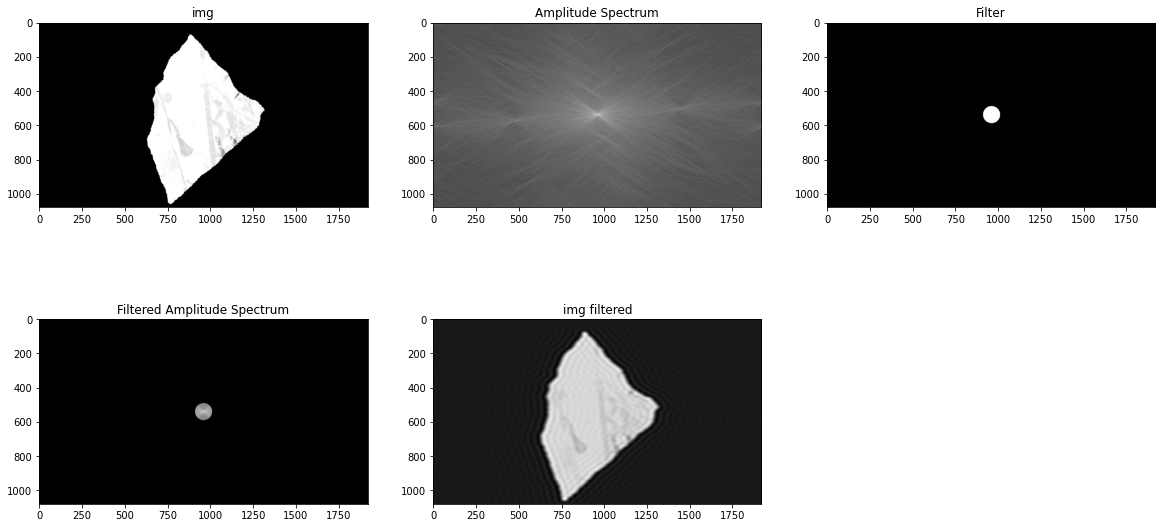

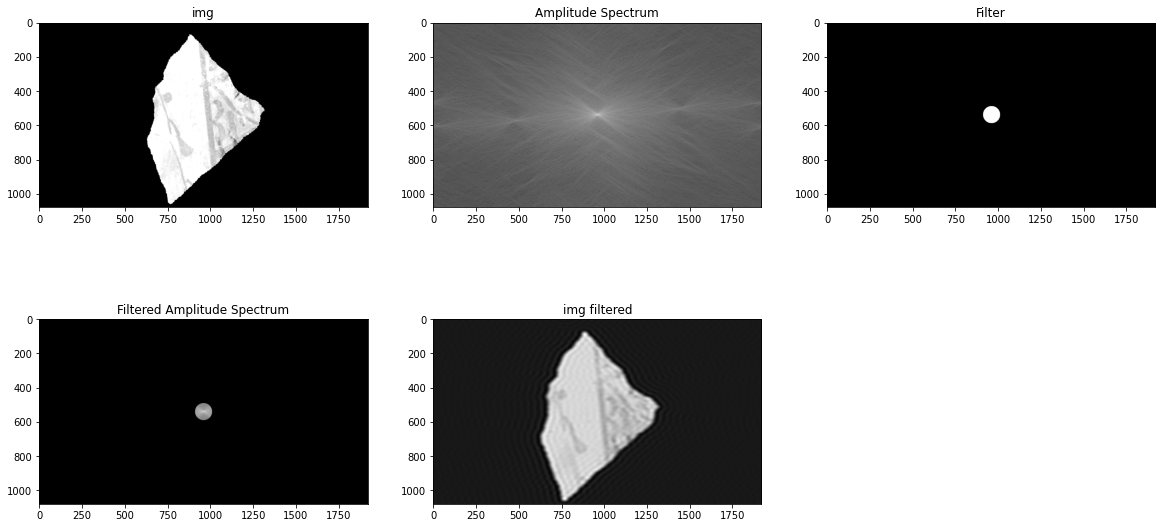

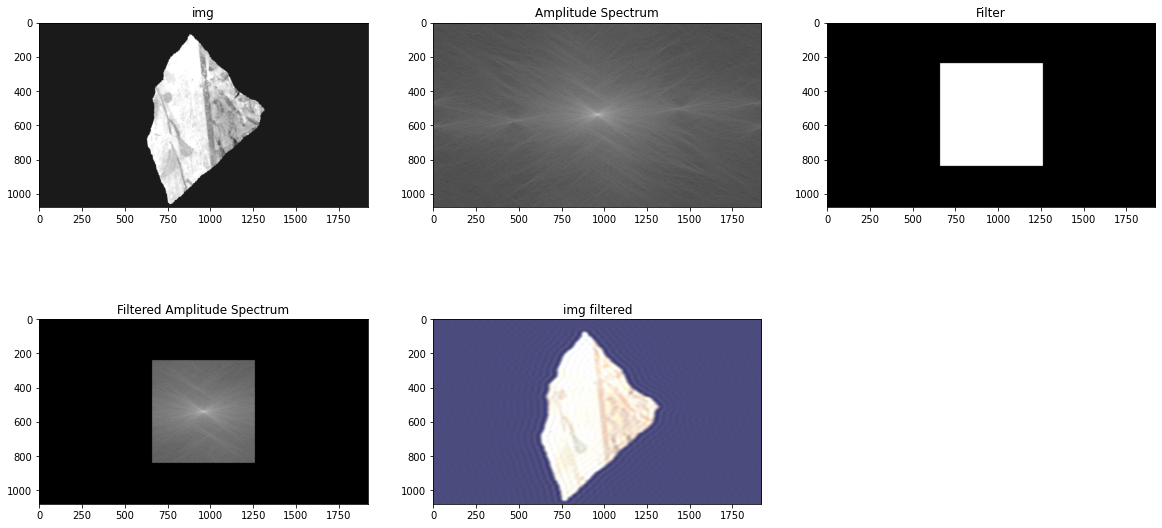

In [100]:
plt.imshow(mask_fourier([r,g,b],masks))

In [98]:
cv2.imwrite("RPf_00152_obj_2.png",filtered_img_rgb)

True

# RPf_00102.png

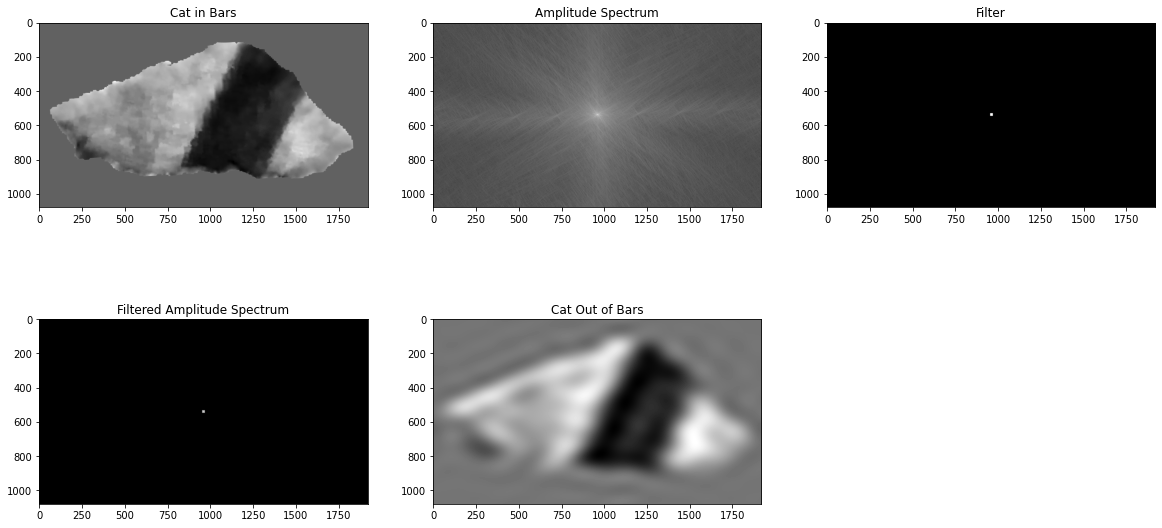

In [20]:
cat_bars = cv2.imread('RPf_00102.png',0) # Reads the original grayscale image
#======= Replace with code to get the cat out of the bars
img_fft = np.fft.fft2(cat_bars)
fshift = np.fft.fftshift(img_fft)

amplitude = 20 * np.log(np.abs(fshift) + 1) #np.zeros_like(cat_bars) # Replace with code to get the image’s amplitude spectrum

mask = np.zeros_like(cat_bars) # Replace with code to create the binary filter (mask)
rows,cols = cat_bars.shape
crow,ccol = rows//2,cols//2
mask_size = 8
mask[crow-mask_size:crow+mask_size,ccol-mask_size:ccol+mask_size] = 1

# r = 8

# for i in range(crow-r, crow+r):
#         for j in range(ccol-r, ccol + r):
#             if (crow - i) ** 2 + (ccol - j) ** 2 <= r**2:
#                 mask[i,j]=1

fshift*=mask
amplitude_filtered = 20 * np.log(np.abs(fshift) + 1) # The amplitude spectrum after the filtering.
cat_out_of_bars = np.fft.ifft2(np.fft.ifftshift(fshift)) # Replace with code to get the cat out of bars (the filtered image)
#========

# Showing the 5 plots requested in this section
fig, axes = plt.subplots(2,3, figsize=(20, 10))
fig.delaxes(axes[1,2])
for img, ax, title in zip([cat_bars, amplitude, mask, amplitude_filtered, np.abs(cat_out_of_bars)],
                          chain.from_iterable(axes), 
                          ["Cat in Bars", "Amplitude Spectrum", "Filter", "Filtered Amplitude Spectrum", "Cat Out of Bars"]):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    


In [21]:
cv2.imwrite("fourier_RPf_00102.png",abs(cat_out_of_bars))

True